
# ES9ZR AI and Machine Learning for Diagnostics

## Python Lecture/Lab 6: Neural Network Implementation and Training
Welcome to the lab tutorial of week 6. This session is focused on solidifying your understanding of neural networks and the training process using a hands-on approach. In this lab, we will first revisit data importing/preprocessing methods and then delve into the practical aspects of defining, training, and evaluating a small neural network with the PyTorch library. I will first do a demo with Iris dataset. Then, you could try to build a test fuction to check your model performance. If there is still time, you could also practice this process with the diabetes dataset we used in the lab 4 (https://www.kaggle.com/datasets/mathchi/diabetes-data-set) to build your first NN!

By the end of this Lab tutorial, you should be able to:

1. Understand the structure and components of a basic neural network, and recognize the significance of proper data handling in the context of machine learning.

2. Apply data preprocessing techniques to prepare a dataset for neural network training, ensuring that the data is shuffled and split into appropriate training, validation, and test sets.

3. Implement and train a small neural network using PyTorch, understanding the forward pass, loss calculation, backpropagation, and the optimizer's role in updating network weights.

4. Evaluate the performance of the trained model on validation and test datasets, and compare this process with previous labs.

In [2]:

# Lab Practice: Iris Classification with a Small Neural Network
# In this lab, you will learn how to preprocess data, split it into training, validation, and test sets,
# and use PyTorch to train a small neural network for classifying the Iris dataset.

#
# Step 0: Import the necessary libraries
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split,TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('all libs imported')

ModuleNotFoundError: No module named 'sklearn'

In [3]:

# Step 1: Load the Iris dataset
IrisLink = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
IrisData = pd.read_csv(IrisLink)

### the string were replaced so that it is easier to be handle in the tensor
IrisData['species'] = IrisData['species'].replace('setosa',0)
IrisData['species'] = IrisData['species'].replace('versicolor',1)
IrisData['species'] = IrisData['species'].replace('virginica',2)
# print(IrisData÷.head)



###### set the feature/independent value
########### X is the 4 features: sepal length/width, petal length/width

X = IrisData.iloc[:,0:4]
# X = IrisData.drop('species',axis = 1)
# print(X)
# print(IrisData.columns)

###### set the label/dependent value
y = IrisData['species']
# print(y)


######### the below is another way to load the dataset
# iris = load_iris()
# print(type(iris))
# X, y = iris.data, iris.target




NameError: name 'pd' is not defined

In [3]:

#### Task 1 can you print the first 5 rows of this iris dataset?
### hint: use print() fuction we learn in the lab 1
print("this is the task 1")

this is the task 1


In [4]:

# Step 2: Data Preprocessing

########### Please be aware that we skip the data cleaning and feature selection! ##################


# do you know why we need to scale the data? It would be good to recall what we learn in week 4
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Convert the data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)
### what is a tensor? Do you know why we need to save the data as a tensors?

# Generate the random shuffled indices
shuffled_indices = torch.randperm(len(X_tensor))

# Index the data using the shuffled indices
X_tensor_shuffled = X_tensor[shuffled_indices]
y_tensor_shuffled = y_tensor[shuffled_indices]
#### why do we shuffule the data? Do you know torch also has an embeded shuffle fuction?



# Split the dataset into training, validation, and test sets (60%, 20%, 20%)
train_size = int(0.6 * len(X_tensor_shuffled))
val_size = int(0.2 * len(X_tensor_shuffled))
test_size = len(X_tensor_shuffled) - train_size - val_size

###
train_dataset_X = X_tensor_shuffled[0:train_size]
val_dataset_X = X_tensor_shuffled[train_size:train_size+val_size]
test_dataset_X = X_tensor_shuffled[train_size+val_size:]

train_dataset_y = y_tensor_shuffled[0:train_size]
val_dataset_y = y_tensor_shuffled[train_size:train_size+val_size]
test_dataset_y = y_tensor_shuffled[train_size+val_size:]

train_dataset = TensorDataset(train_dataset_X, train_dataset_y)
val_dataset = TensorDataset(val_dataset_X, val_dataset_y)
test_dataset = TensorDataset(test_dataset_X, test_dataset_y)


torch.manual_seed(0)  # For reproducibility


In [5]:
#### Task 2.1 Please print the number of cases in each dataset
print(f"the training set has ? cases \n the val set has ? cases \n the test set has ? cases")

the training set has ? cases 
 the val set has ? cases 
 the test set has ? cases


In [6]:
### Task 2.2 please tell your classmate next to you, is a 60%:20%:20% a good split?

In [7]:
############# To build the dataset, you can do it another way as follow:
# dataset = TensorDataset(X_tensor_shuffled, y_tensor_shuffled)
# train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])





In [8]:
### Task 2.3 print the reason why we need to rescale the dataset
print("the reason to rescale the dataset is: I don't know it yet")

the reason to rescale the dataset is: I don't know it yet


In [9]:

# Step 3: Define a DataLoader for each set

### the  batch_size here refer to how many case were used to evaluate in an epoch. Be careful when you have limited RAM for a ML task (e.g., <4GB).
batch_size = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [10]:
##### Task 3 Try change/play the batch_size to another value and see what happen?
print("There is something happened, which is:")

There is something happened, which is:


In [11]:

# Step 4: Define the Neural Network architecture
class IrisNet(nn.Module):
    def __init__(self):
      ##### inheritate the parmeters and function
        super(IrisNet, self).__init__()
        ### this is the first fully connected layer
        self.fc1 = nn.Linear(4, 5)  # 4 features in Iris dataset, 5 neurons in hidden layer
        ### this is the sedconds fully connected layer
        self.fc2 = nn.Linear(5, 3)  # 5 input from the last layer, 3 output classes

    def forward(self, x):
      ##### relu here refere to Rectified Linear Unit: output x if x>0, else output 0.
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the network
model = IrisNet()


In [12]:
##### Task 4 Try change/play the fully connected layer (add a layer? change the number of neurons?) and see what happen?
print('This is the task 4')

This is the task 4


In [13]:

# Step 5: Define the loss function and optimizer
## CrossEntropy is a typical parameter to evaluate the loss
criterion = nn.CrossEntropyLoss()
## Adam here refere to Adaptive Moment Estimation, the lr is learning rate, one of the key hyper parameters
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


In [14]:
##### Task 5 Try change/play the value of the lr (learning rate), rerun the whole program again, and see what happen?
print('This is the task 5, I see something:')

This is the task 5, I see something:


Epoch 1/10, Loss: 0.1105, Validation Loss: 0.1786
Epoch 2/10, Loss: 0.0100, Validation Loss: 0.0933
Epoch 3/10, Loss: 0.0013, Validation Loss: 0.1967
Epoch 4/10, Loss: 0.0082, Validation Loss: 0.0660
Epoch 5/10, Loss: 0.0117, Validation Loss: 0.0539
Epoch 6/10, Loss: 0.0016, Validation Loss: 0.3373
Epoch 7/10, Loss: 0.0051, Validation Loss: 0.0477
Epoch 8/10, Loss: 0.0032, Validation Loss: 0.0864
Epoch 9/10, Loss: 0.0013, Validation Loss: 0.1900
Epoch 10/10, Loss: 0.0026, Validation Loss: 0.0665


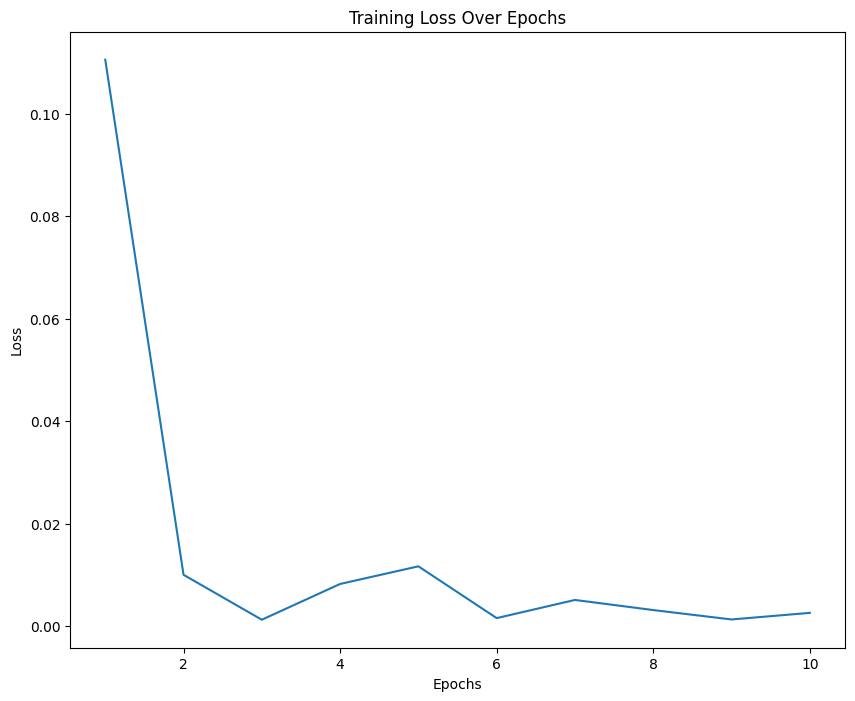

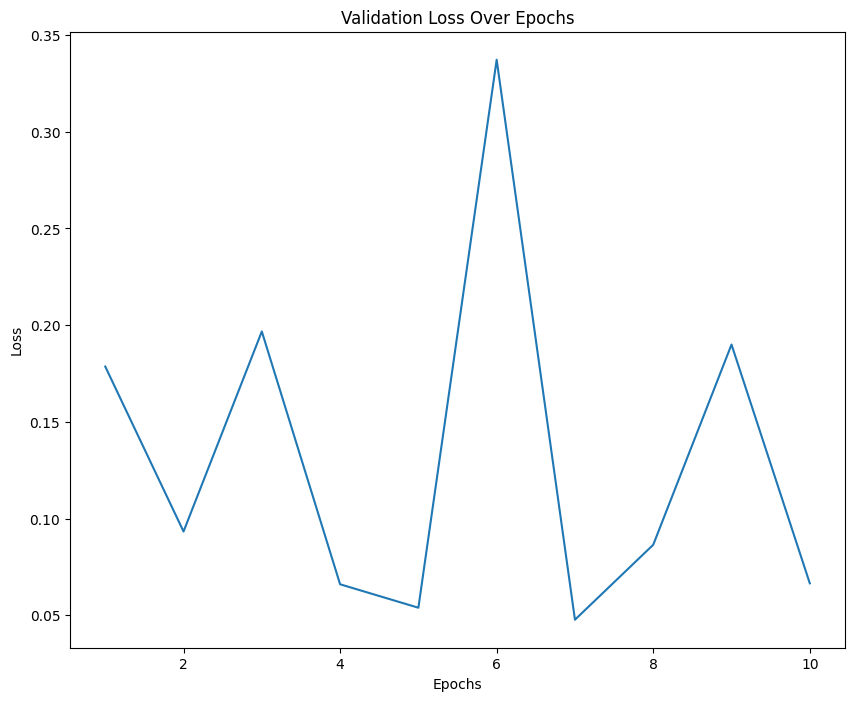

In [15]:

# Step 6: Train the Neural Network
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=10):
    LossInTrain = []
    LossInVal = []

    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validation loss
        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Validation Loss: {val_loss/len(val_loader):.4f}')
        LossInTrain.append(loss.item())
        LossInVal.append(val_loss/len(val_loader))

        # LossInTrain = LossInTrain.

    #####Visulise your train/val loss
    plt.figure(figsize=(10,8))
    plt.plot(range(1,epochs+1),LossInTrain, label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()


    plt.figure(figsize=(10,8))
    plt.plot(range(1,epochs+1),LossInVal, label='Valication Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Validation Loss Over Epochs')
    plt.show()





# Let's train for a small number of epochs
train_model(model, criterion, optimizer, train_loader, val_loader, epochs=10)


In [16]:
##### Task 6 Try change/play the value of the epochs, rerun the whole program again, and see what happen?
print('This is the task 6, I see something:')

This is the task 6, I see something:


In [17]:

# Step 7: Validate the Model
def validate_model(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f'Validation Accuracy: {val_accuracy:.2f}%')

validate_model(model, val_loader)



Validation Accuracy: 96.67%


In [18]:
#Build your test fuction
# Task 6 You will perform this step as an exercise. Use the test_loader to evaluate the model's performance.
## hints: try to imitate the format of validate the model


In [19]:
##### Hidden task ###########
#### can you do it again for the diabetes dataset?

##### Hidden toy: https://playground.tensorflow.org/

### By:  Zhizhuo Su
### Date: 07/11/2023
### WMG, the University of Warwick